In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV


In [3]:
# List of dataset file paths
dataset_paths = [
    "C:/Users/DELL/Desktop/SIBI/datasets/heart_disease_uci.csv", "C:/Users/DELL/Desktop/SIBI/datasets/heart_disease_health_indicators_BRFSS2015.csv","C:/Users/DELL/Desktop/SIBI/datasets/heart_2020_cleaned.csv","C:/Users/DELL/Desktop/SIBI/datasets/heart_cleveland_upload.csv","C:/Users/DELL/Desktop/SIBI/datasets/heart.csv"
]

In [29]:
# Load and preview each dataset
datasets = {}
for i, path in enumerate(dataset_paths, start=1):
    datasets[f"Dataset {i}"] = pd.read_csv(path)
    print(f"Preview of {path}:")
    display(datasets[f"Dataset {i}"].head())


Preview of C:/Users/DELL/Desktop/SIBI/datasets/heart_disease_uci.csv:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Preview of C:/Users/DELL/Desktop/SIBI/datasets/heart_disease_health_indicators_BRFSS2015.csv:


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Preview of C:/Users/DELL/Desktop/SIBI/datasets/heart_2020_cleaned.csv:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Preview of C:/Users/DELL/Desktop/SIBI/datasets/heart_cleveland_upload.csv:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Preview of C:/Users/DELL/Desktop/SIBI/datasets/heart.csv:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Summary statistics for each dataset
for name, data in datasets.items():
    print(f"\nSummary Statistics for {name}:")
    print(data.describe().T)



Summary Statistics for Dataset 1:
          count        mean         std   min     25%    50%     75%    max
id        920.0  460.500000  265.725422   1.0  230.75  460.5  690.25  920.0
age       920.0   53.510870    9.424685  28.0   47.00   54.0   60.00   77.0
trestbps  861.0  132.132404   19.066070   0.0  120.00  130.0  140.00  200.0
chol      890.0  199.130337  110.780810   0.0  175.00  223.0  268.00  603.0
thalch    865.0  137.545665   25.926276  60.0  120.00  140.0  157.00  202.0
oldpeak   858.0    0.878788    1.091226  -2.6    0.00    0.5    1.50    6.2
ca        309.0    0.676375    0.935653   0.0    0.00    0.0    1.00    3.0
num       920.0    0.995652    1.142693   0.0    0.00    1.0    2.00    4.0

Summary Statistics for Dataset 2:
                         count       mean       std   min   25%   50%   75%  \
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol 

In [5]:
# Missing values analysis
for name, data in datasets.items():
    print(f"\nMissing Values in {name}:")
    missing_values = data.isnull().mean() * 100
    print(missing_values[missing_values > 0])



Missing Values in Dataset 1:
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
dtype: float64

Missing Values in Dataset 2:
Series([], dtype: float64)

Missing Values in Dataset 3:
Series([], dtype: float64)

Missing Values in Dataset 4:
Series([], dtype: float64)

Missing Values in Dataset 5:
Series([], dtype: float64)


In [7]:
# Feature type analysis
for name, data in datasets.items():
    print(f"\nFeature Types in {name}:")
    numerical = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical = data.select_dtypes(include=['object']).columns.tolist()
    binary = [col for col in numerical if data[col].nunique() == 2]  # Find binary numerical features
    
    print("Numerical Features:", numerical)
    print("Categorical Features:", categorical)
    print("Binary Features:", binary)



Feature Types in Dataset 1:
Numerical Features: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
Categorical Features: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Binary Features: []

Feature Types in Dataset 2:
Numerical Features: ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Categorical Features: []
Binary Features: ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

Feature Types in Dataset 3:
Numerical Features: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Categorical Features: ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',

In [9]:
# Correlation analysis with target variable
target_column = "target"  # Replace with actual target column name if different
for name, data in datasets.items():
    if target_column in data.columns:
        print(f"\nCorrelation Analysis in {name}:")
        correlation_matrix = data.corr()[target_column].sort_values(ascending=False)
        print(correlation_matrix)



Correlation Analysis in Dataset 5:
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64



Visualizations for Dataset 1:


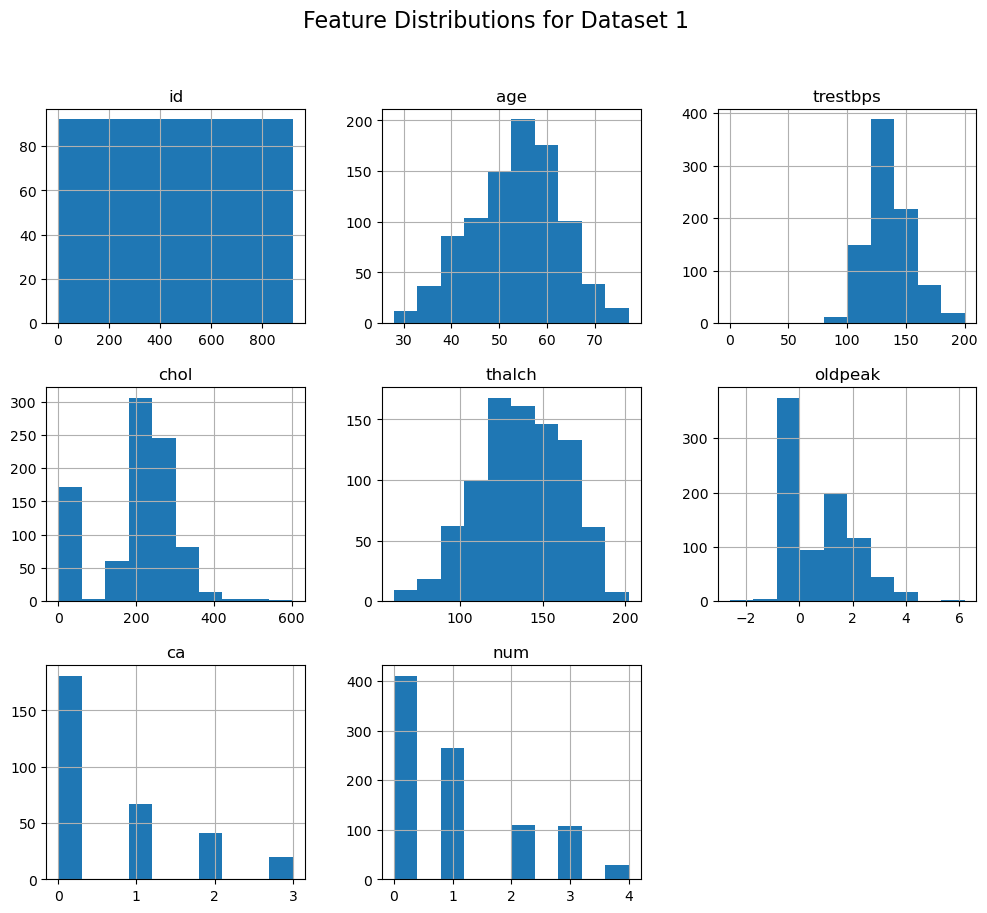

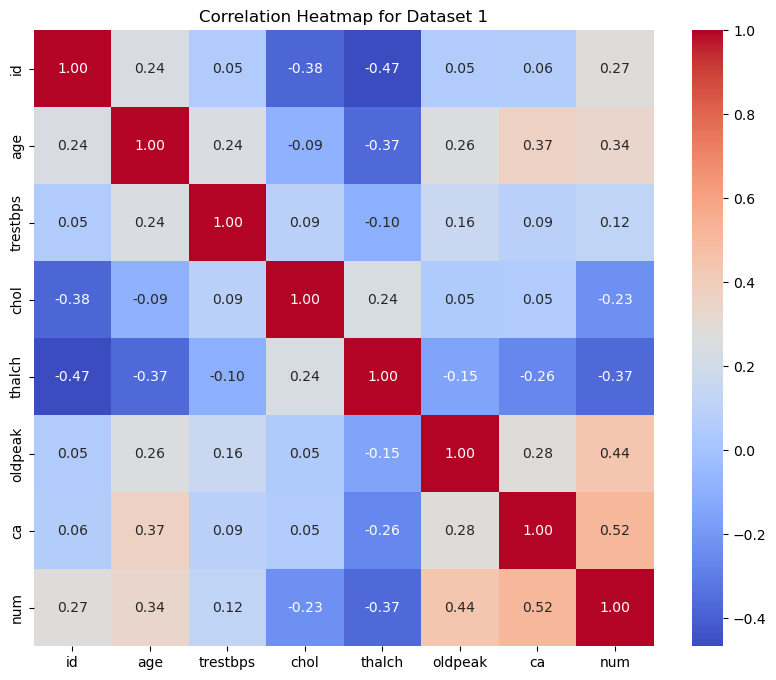


Visualizations for Dataset 2:


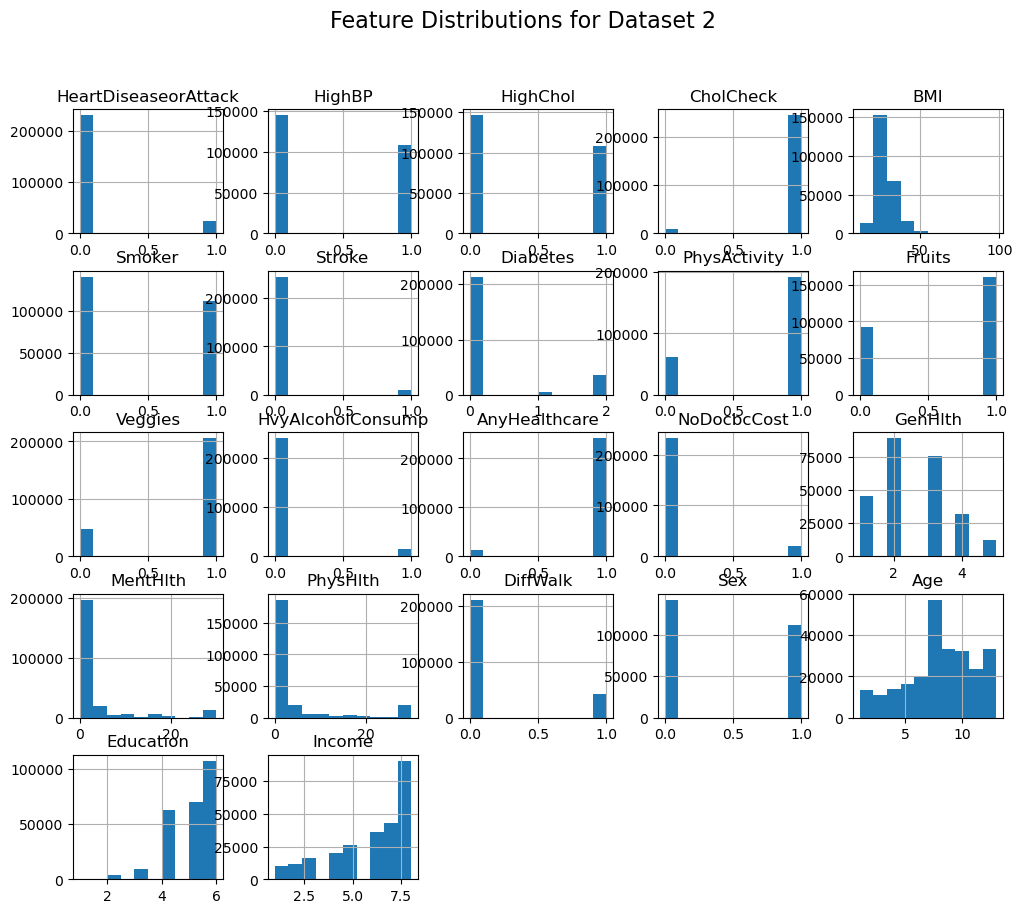

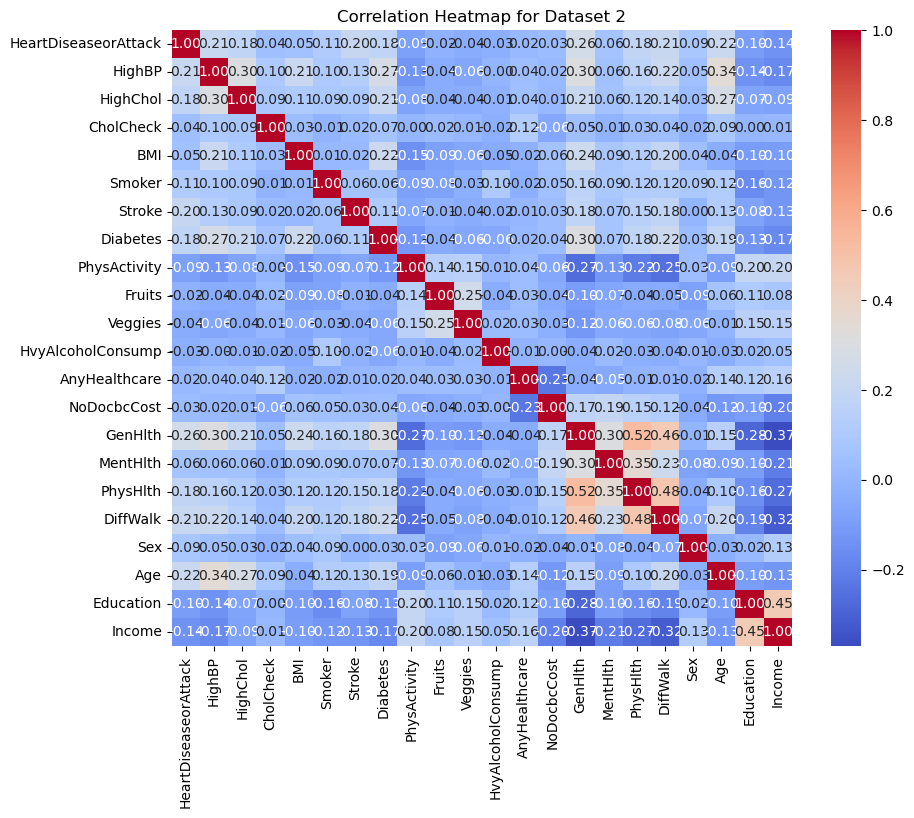


Visualizations for Dataset 3:


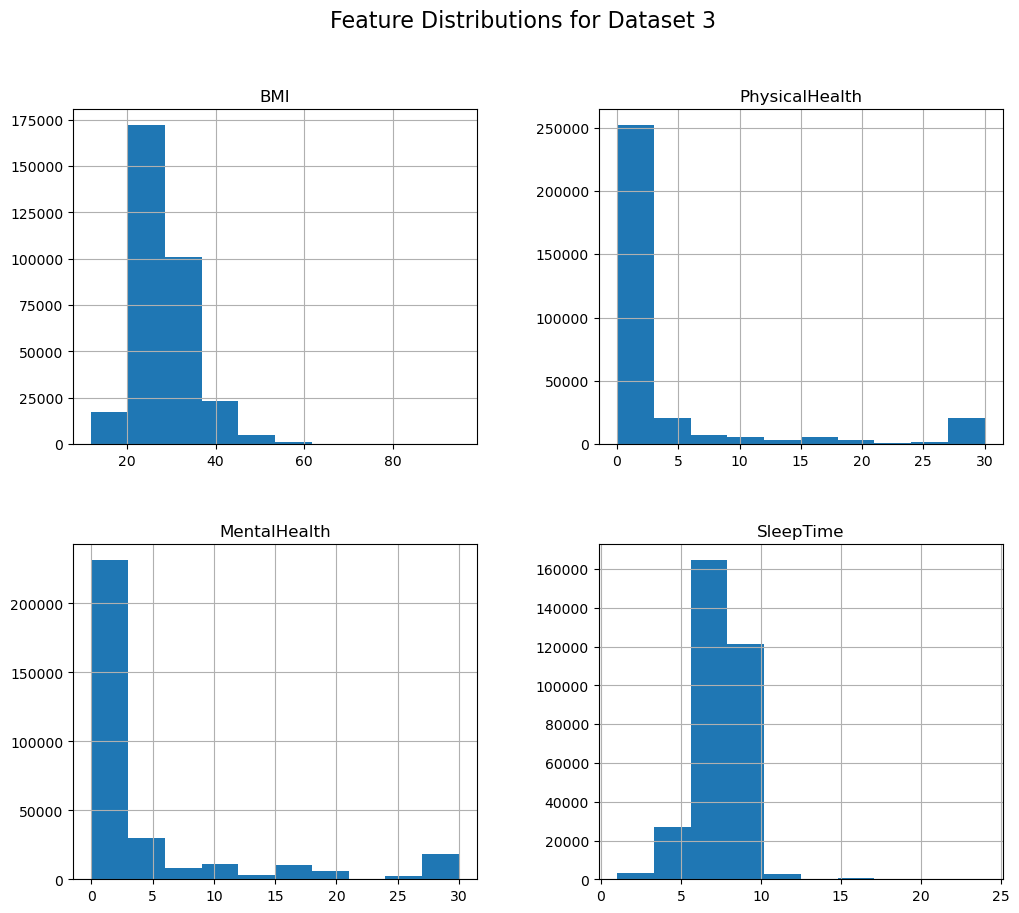

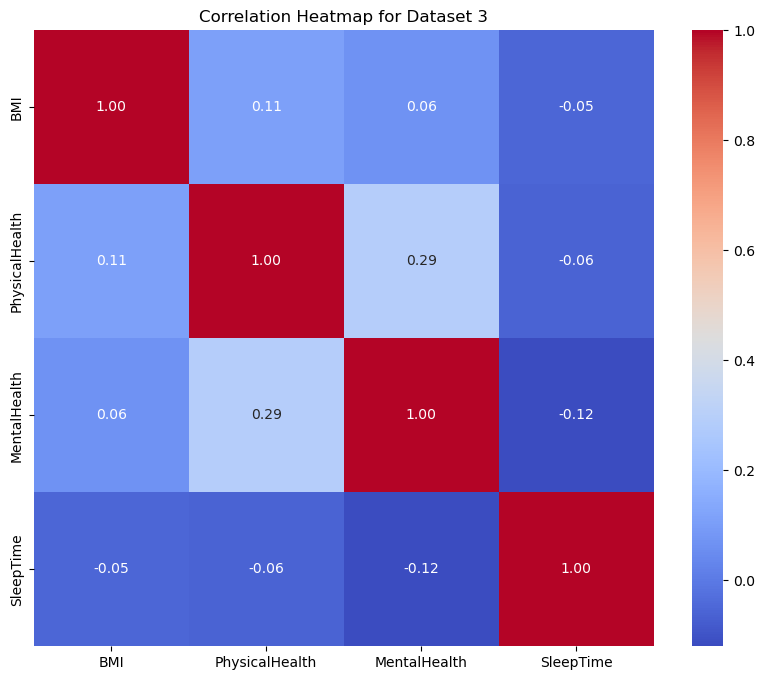


Visualizations for Dataset 4:


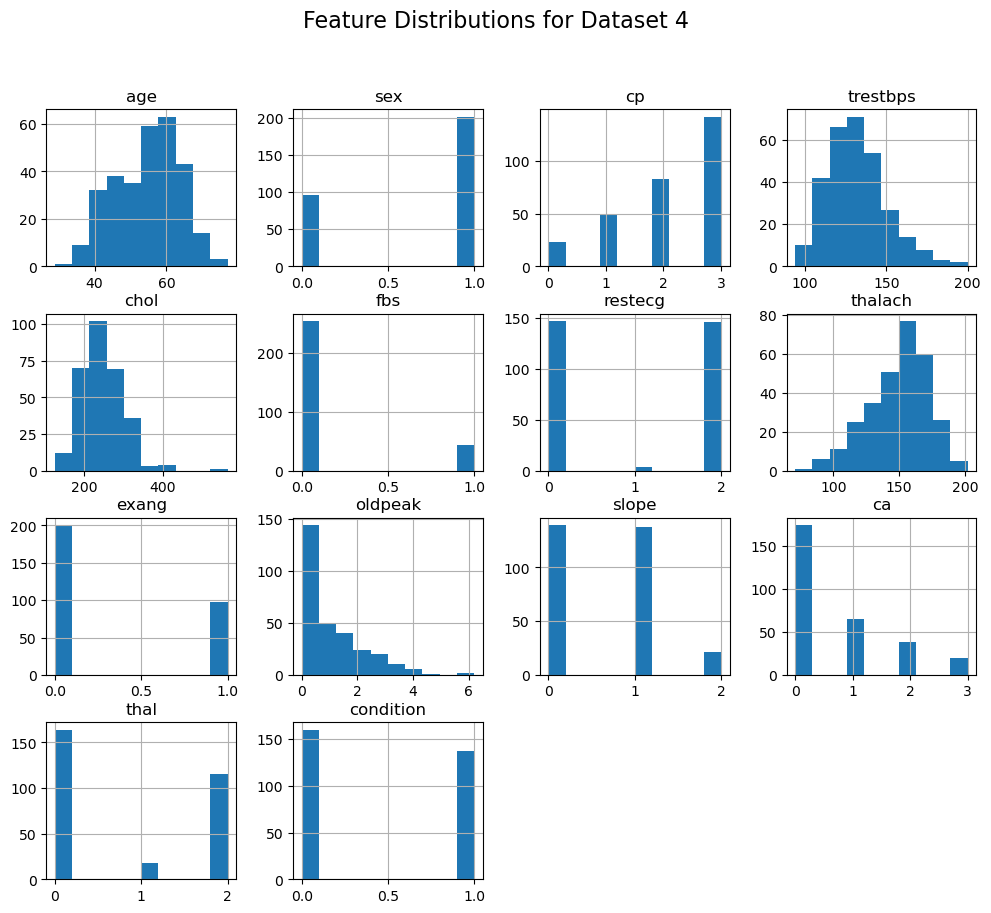

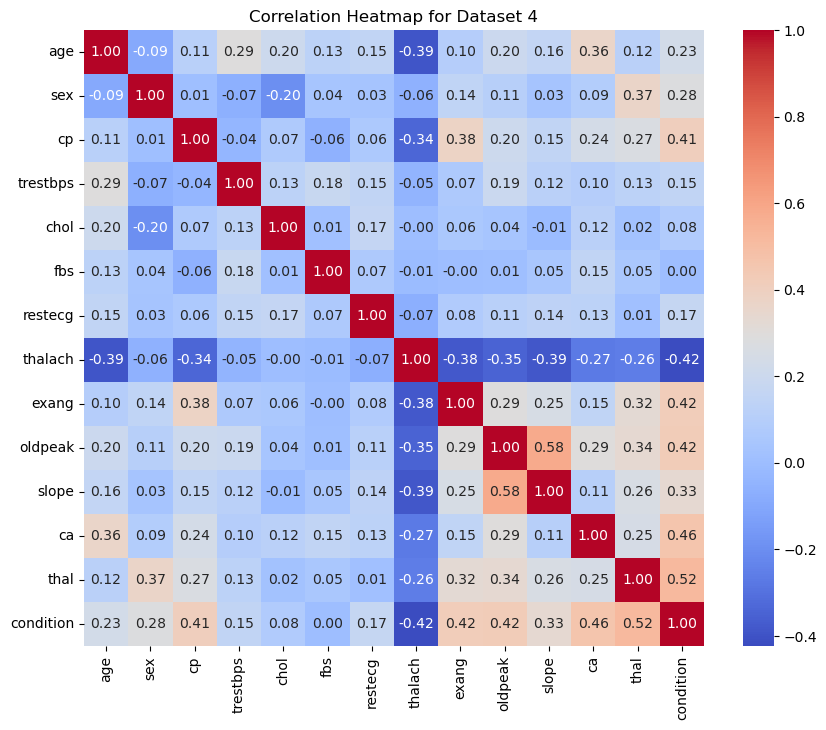


Visualizations for Dataset 5:


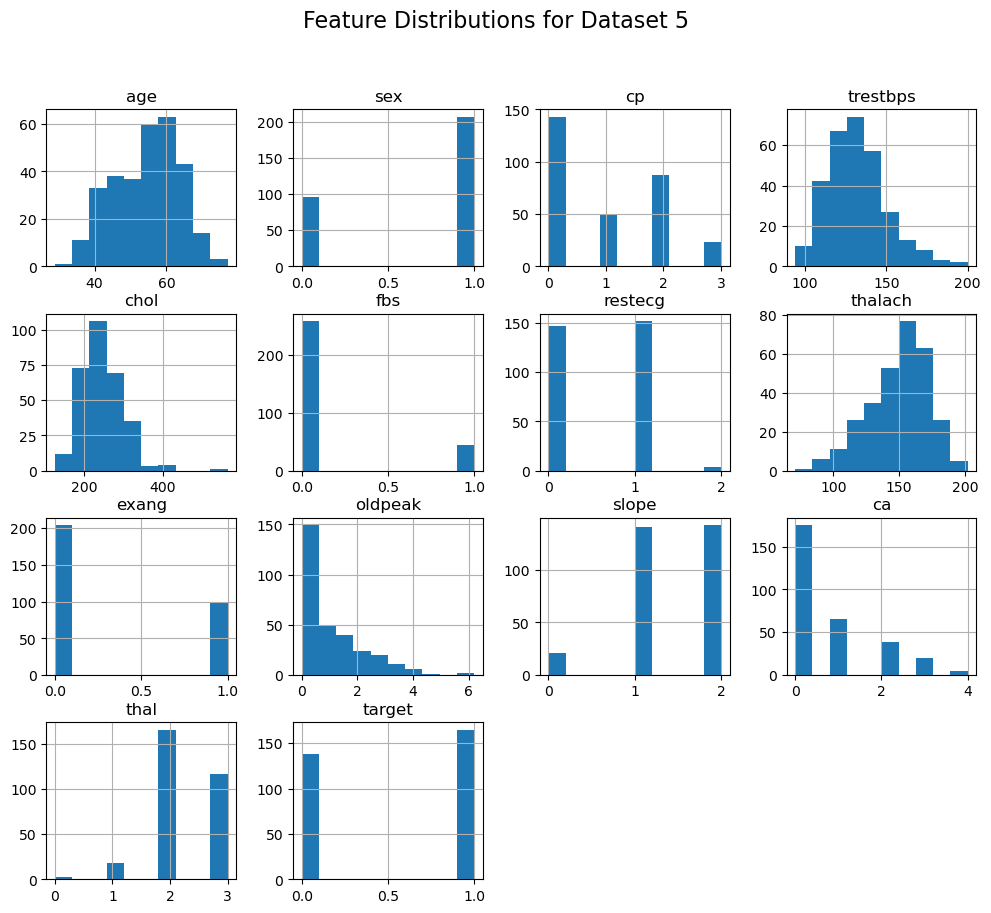

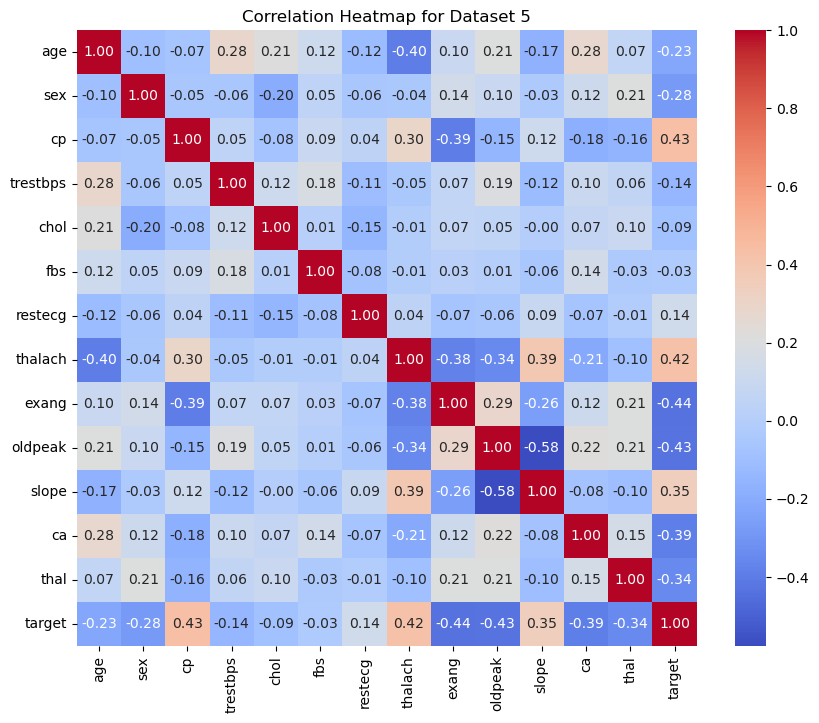

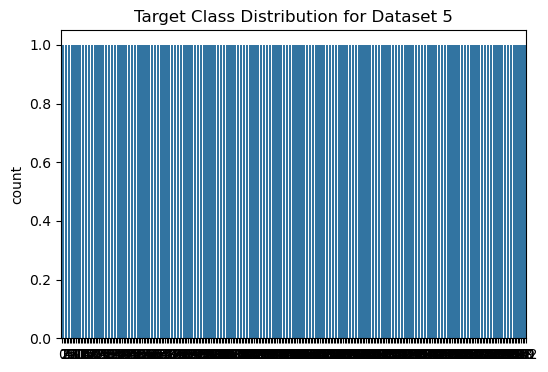

In [11]:
# Visualization for each dataset
for name, data in datasets.items():
    print(f"\nVisualizations for {name}:")

    # Plot distribution of numerical features
    numerical = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical].hist(figsize=(12, 10))
    plt.suptitle(f"Feature Distributions for {name}", fontsize=16)
    plt.show()

    # Correlation heatmap for numerical features
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[numerical].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap for {name}")
    plt.show()

    # Target class balance
    if target_column in data.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data[target_column])
        plt.title(f"Target Class Distribution for {name}")
        plt.show()


In [13]:

# Define a function to classify features by type
def classify_features(data):
    numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()
    binary_features = [col for col in numerical_features if data[col].nunique() == 2]
    # Exclude binary features from numerical features
    numerical_features = [col for col in numerical_features if col not in binary_features]
    return numerical_features, categorical_features, binary_features

# Load and classify features for each dataset
datasets = {}
feature_types = {}

for i, path in enumerate(dataset_paths, start=1):
    datasets[f"Dataset {i}"] = pd.read_csv(path)
    numerical, categorical, binary = classify_features(datasets[f"Dataset {i}"])
    feature_types[f"Dataset {i}"] = {
        "Numerical Features": numerical,
        "Categorical Features": categorical,
        "Binary Features": binary
    }

# Display feature types for each dataset
for name, types in feature_types.items():
    print(f"\nFeature Types for {name}:")
    print("Numerical Features:", types["Numerical Features"])
    print("Categorical Features:", types["Categorical Features"])
    print("Binary Features:", types["Binary Features"])


Feature Types for Dataset 1:
Numerical Features: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
Categorical Features: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Binary Features: []

Feature Types for Dataset 2:
Numerical Features: ['BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
Categorical Features: []
Binary Features: ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

Feature Types for Dataset 3:
Numerical Features: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Categorical Features: ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Binary Features: []

Feature Types for Dataset 4:
Numerical Features: ['age', 'cp', 'trest

In [15]:
#preprocessing:

In [5]:
# Update possible target columns to include "HeartDiseaseorAttack"
possible_target_columns = ["target", "HeartDisease", "condition", "num", "HeartDiseaseorAttack"]


In [7]:
# Load and preprocess data with sampling for large datasets
def load_and_preprocess_data(path, sample_size=20000):
    data = pd.read_csv(path)
    
    # Use sampling for large datasets
    if len(data) > sample_size:
        data = data.sample(n=sample_size, random_state=42)
        print(f"Dataset {path} downsampled to {sample_size} rows for faster processing.")
    
    # Detect target column
    target_column = next((col for col in possible_target_columns if col in data.columns), None)
    if not target_column:
        print(f"Warning: Target column not found in {path}. Columns found:", data.columns)
        raise ValueError(f"Target column not found in {path}. Please update the target detection logic.")
    
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Detect feature types
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    binary_features = [col for col in numerical_features if X[col].nunique() == 2]
    numerical_features = [col for col in numerical_features if col not in binary_features]
    categorical_features = [col for col in X.columns if X[col].dtype == 'object' or 
                            (col not in numerical_features and col not in binary_features)]
    
    # Impute missing values for numerical features
    imputer = SimpleImputer(strategy="mean")
    X[numerical_features] = imputer.fit_transform(X[numerical_features])
    
    # Scale numerical features
    scaler = MinMaxScaler()
    X[numerical_features] = scaler.fit_transform(X[numerical_features])
    
    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=categorical_features)
    
    # Label encode binary features
    for feature in binary_features:
        if X[feature].dtype != 'int64' and X[feature].dtype != 'float64':
            X[feature] = LabelEncoder().fit_transform(X[feature].astype(str))
    
    return X, y

# Load datasets with sampling for large datasets
try:
    datasets = [load_and_preprocess_data(path) for path in dataset_paths]
except ValueError as e:
    print(e)

Dataset C:/Users/DELL/Desktop/SIBI/datasets/heart_disease_health_indicators_BRFSS2015.csv downsampled to 20000 rows for faster processing.
Dataset C:/Users/DELL/Desktop/SIBI/datasets/heart_2020_cleaned.csv downsampled to 20000 rows for faster processing.


In [9]:
# Feature Selection Function with fewer features for efficiency
def apply_feature_selection(X, y, method='univariate'):
    if method == 'univariate':
        selector = SelectKBest(f_classif, k=5)  # Selecting top 5 features
        X_selected = selector.fit_transform(X, y)
    elif method == 'rfe':
        model = RandomForestClassifier()
        selector = RFE(model, n_features_to_select=5)
        X_selected = selector.fit_transform(X, y)
    elif method == 'pca':
        pca = PCA(n_components=5)
        X_selected = pca.fit_transform(X)
    return X_selected

In [11]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier()
}


In [13]:
# Simplified hyperparameter tuning with fewer iterations for large datasets
def tune_hyperparameters(model, X_train, y_train):
    param_grid = {
        "LogisticRegression": {'C': [0.1, 1]},
        "SVC": {'C': [1, 10], 'kernel': ['linear']},
        "RandomForestClassifier": {'n_estimators': [50, 100]},
        "ExtraTreesClassifier": {'n_estimators': [50, 100]},
        "AdaBoostClassifier": {'n_estimators': [50, 100]}
    }
    model_param_grid = param_grid.get(model.__class__.__name__, {})
    
    if model_param_grid:
        search = RandomizedSearchCV(model, model_param_grid, cv=3, n_iter=3, random_state=42)
        search.fit(X_train, y_train)
        return search.best_estimator_
    else:
        return model

In [19]:
# Result storage for visualization
results = []


In [21]:
# Model training and evaluation function with results collection
def train_and_evaluate(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    
    for model_name, model in models.items():
        tuned_model = tune_hyperparameters(model, X_train, y_train)
        tuned_model.fit(X_train, y_train)
        y_pred = tuned_model.predict(X_test)
        
        # Evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Append results for visualization
        results.append({
            "Dataset": dataset_name,
            "Model": model_name,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

        # Confusion matrix visualization
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"{model_name} - Confusion Matrix ({dataset_name})")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()



Processing Dataset 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


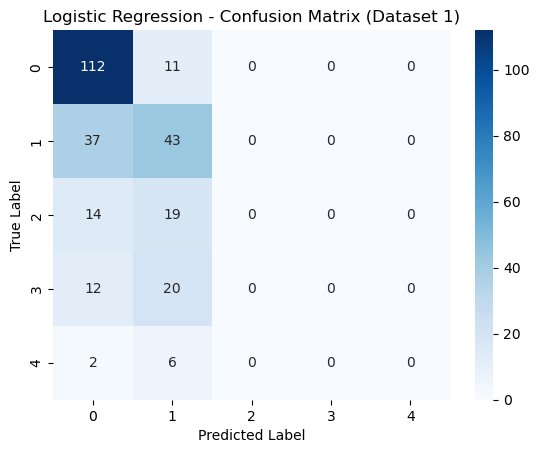

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


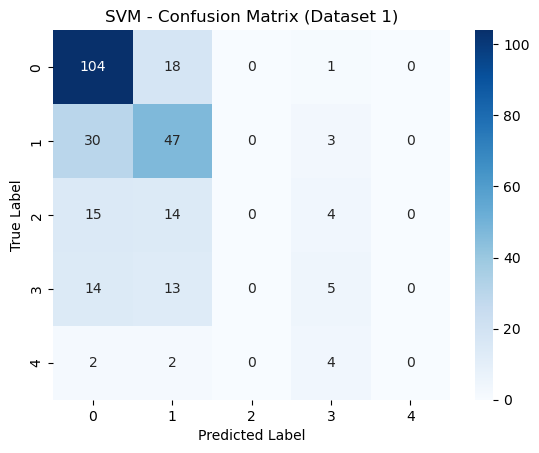

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


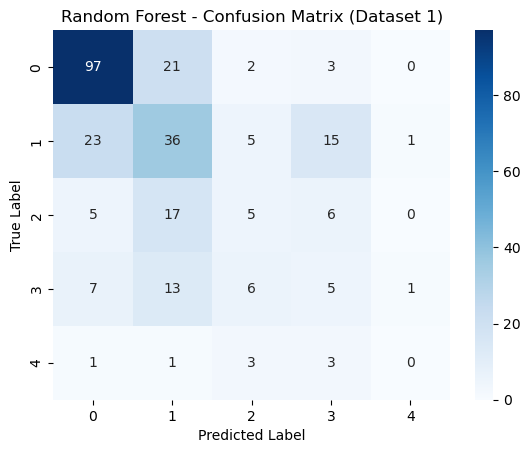

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


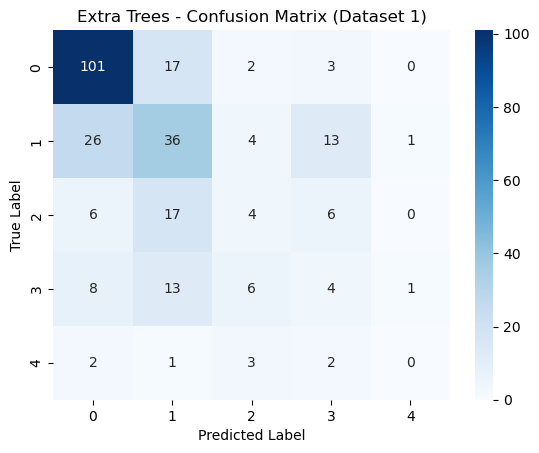

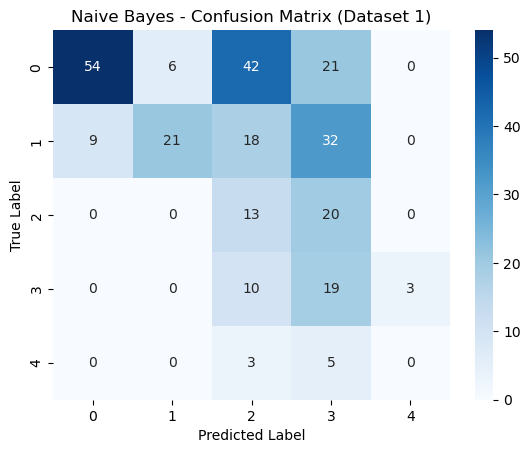

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda

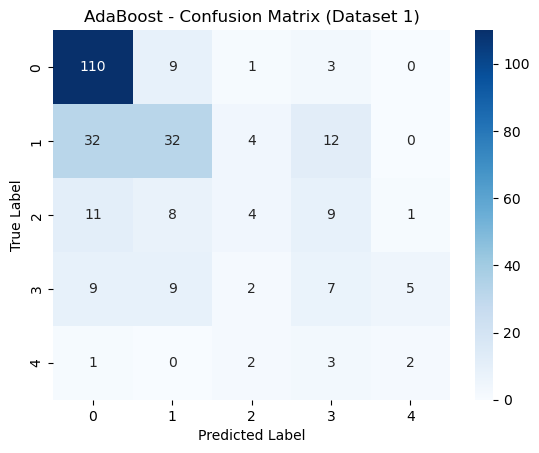


Processing Dataset 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


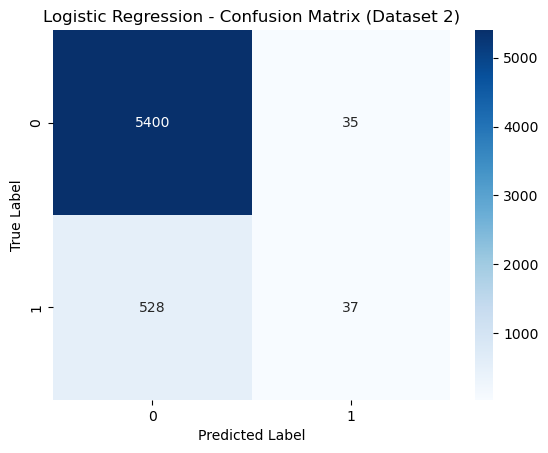

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


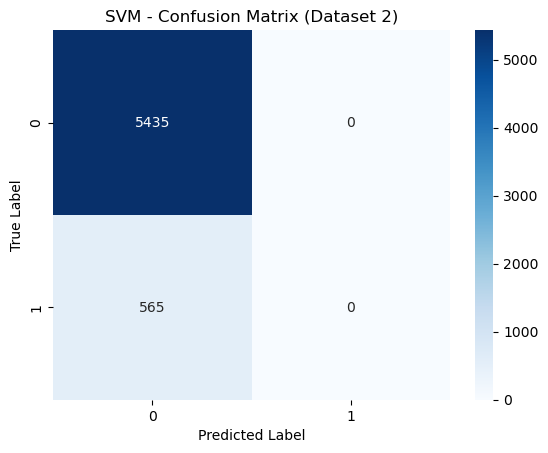

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


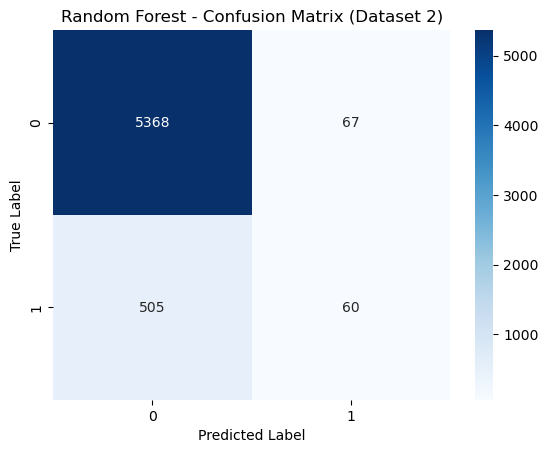

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


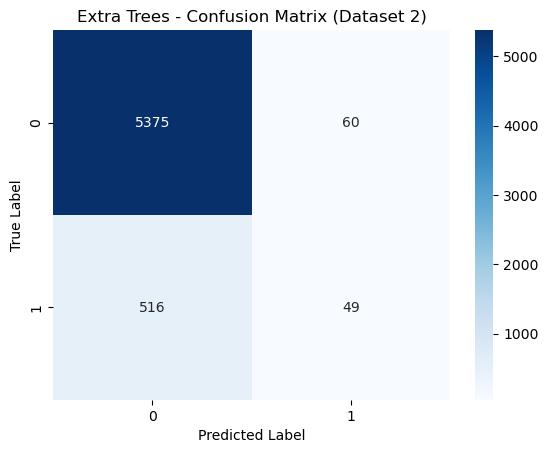

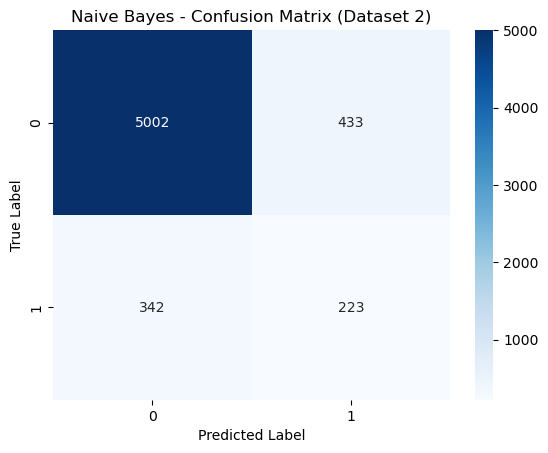

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda

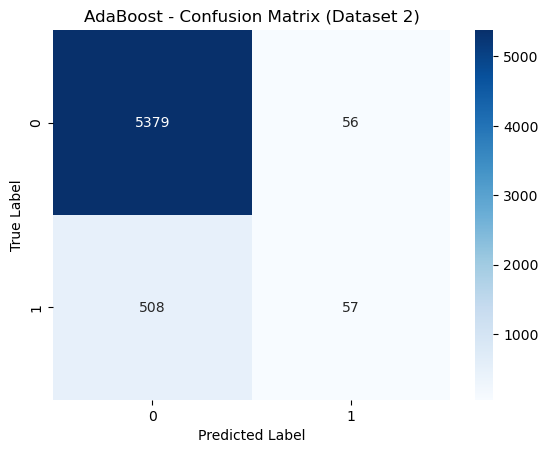


Processing Dataset 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


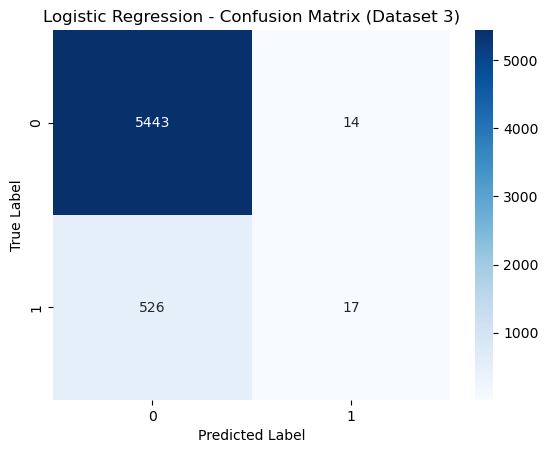

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


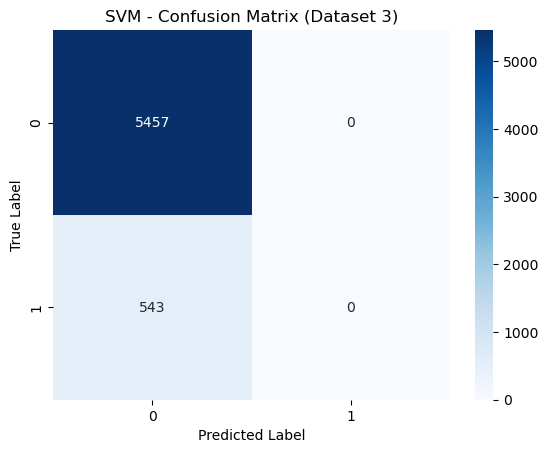

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


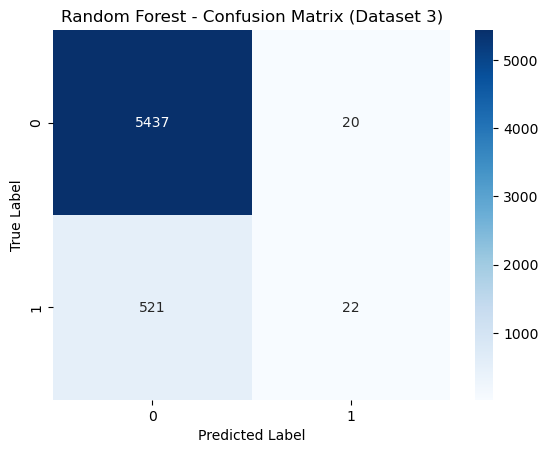

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


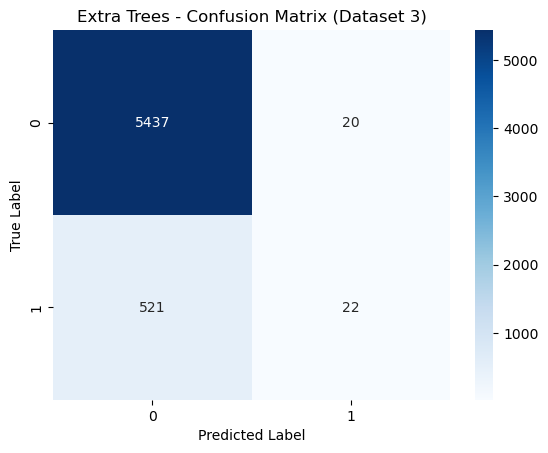

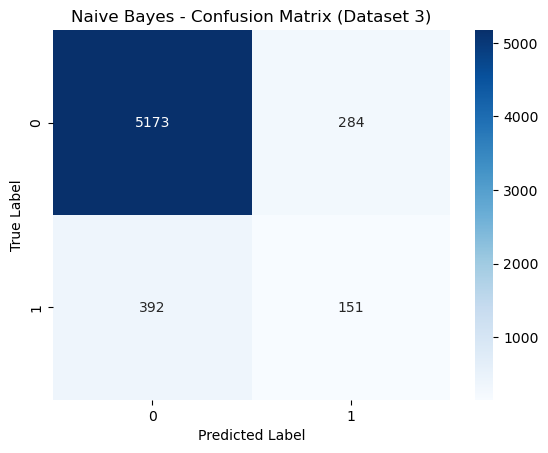

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda

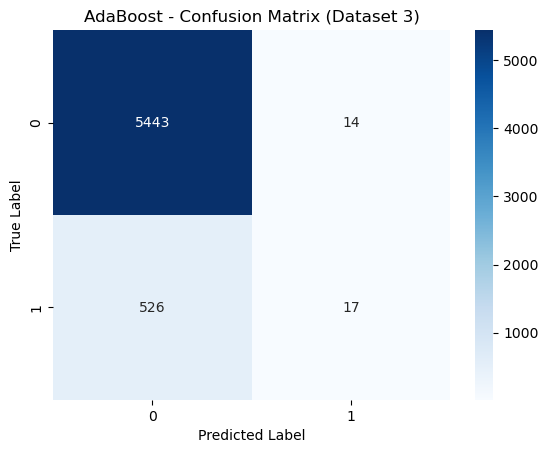


Processing Dataset 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


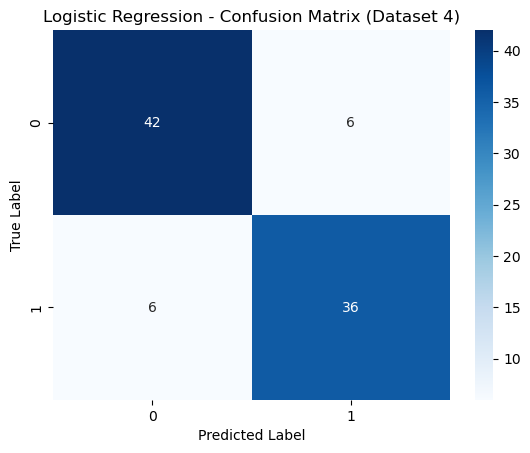

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


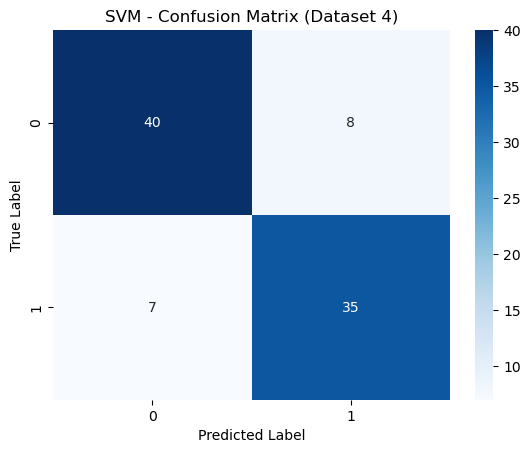

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


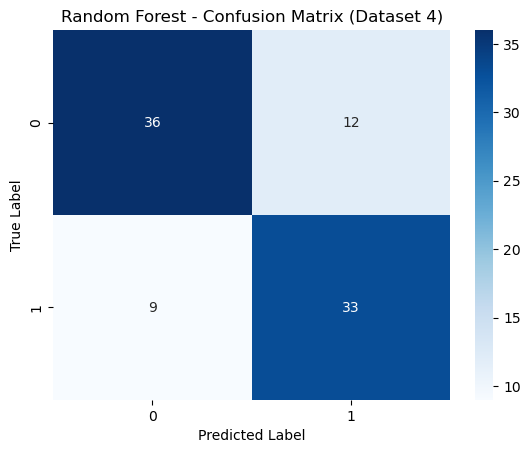

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


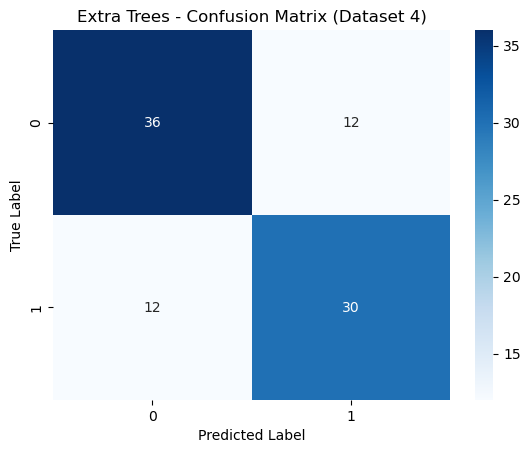

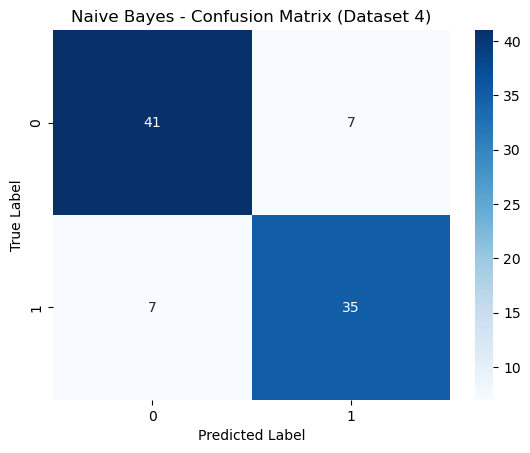

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda

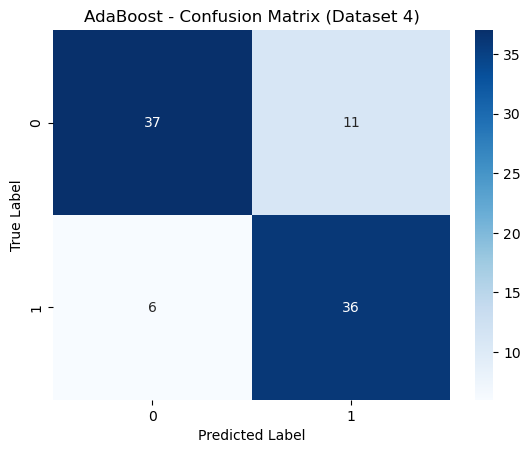


Processing Dataset 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


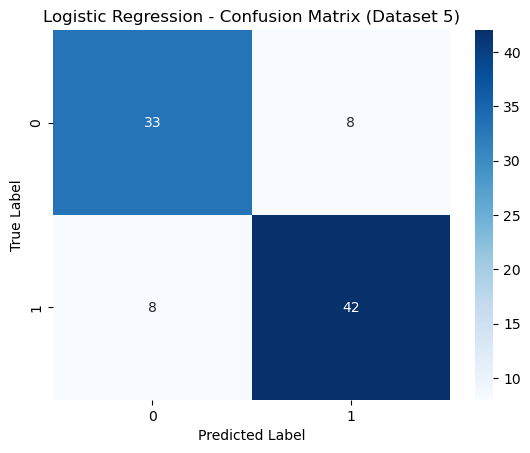

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


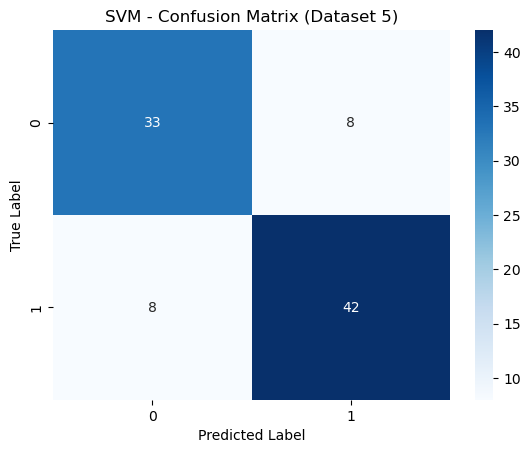

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


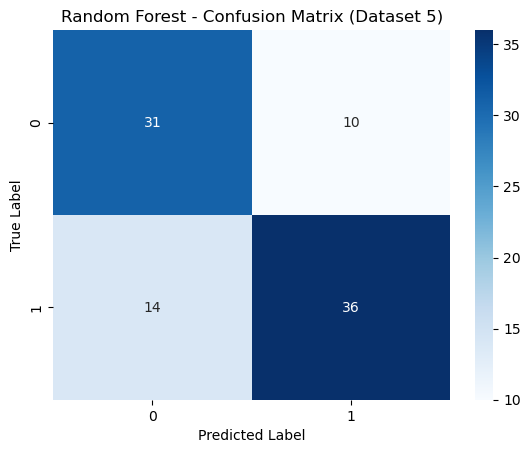

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


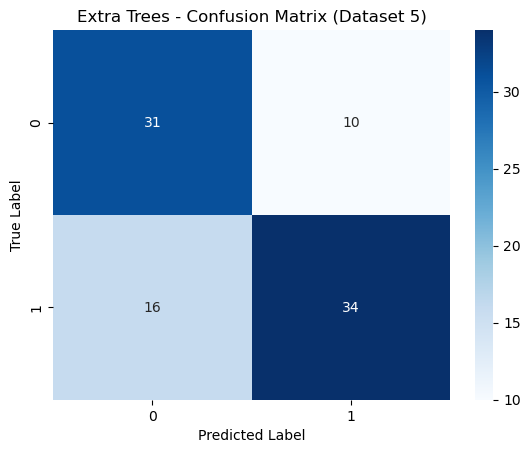

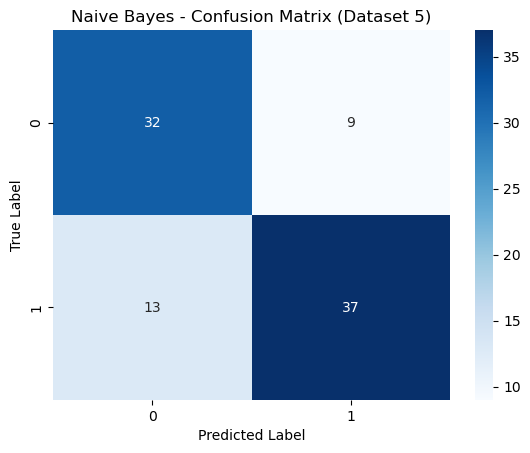

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda

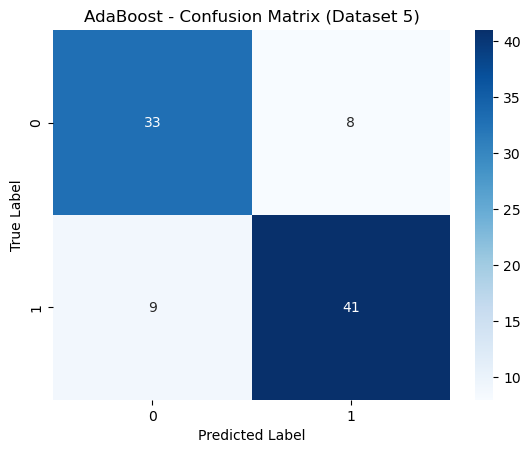

In [23]:
# Run the full methodology on each dataset with results collection
for i, (X, y) in enumerate(datasets):
    dataset_name = f"Dataset {i+1}"
    print(f"\nProcessing {dataset_name}")
    
    # Apply optimized feature selection
    X_selected = apply_feature_selection(X, y, method='univariate')
    
    # Train and evaluate models
    train_and_evaluate(X_selected, y, dataset_name)


In [29]:
# Convert results to DataFrame for easier plotting and display
results_df = pd.DataFrame(results)

# Print the complete results table
print("\n--- Model Performance Summary ---")
print(results_df)




--- Model Performance Summary ---
      Dataset                Model  Accuracy  Precision    Recall  F1 Score
0   Dataset 1  Logistic Regression  0.561594   0.407891  0.561594  0.472014
1   Dataset 1                  SVM  0.565217   0.459924  0.565217  0.502110
2   Dataset 1        Random Forest  0.518116   0.490185  0.518116  0.502202
3   Dataset 1          Extra Trees  0.525362   0.480720  0.525362  0.499535
4   Dataset 1          Naive Bayes  0.387681   0.648215  0.387681  0.432818
5   Dataset 1             AdaBoost  0.561594   0.528573  0.561594  0.529869
6   Dataset 2  Logistic Regression  0.906167   0.873543  0.906167  0.871892
7   Dataset 2                  SVM  0.905833   0.820534  0.905833  0.861076
8   Dataset 2        Random Forest  0.904667   0.872432  0.904667  0.876342
9   Dataset 2          Extra Trees  0.904000   0.868822  0.904000  0.873458
10  Dataset 2          Naive Bayes  0.870833   0.879874  0.870833  0.875101
11  Dataset 2             AdaBoost  0.906000   0.8751

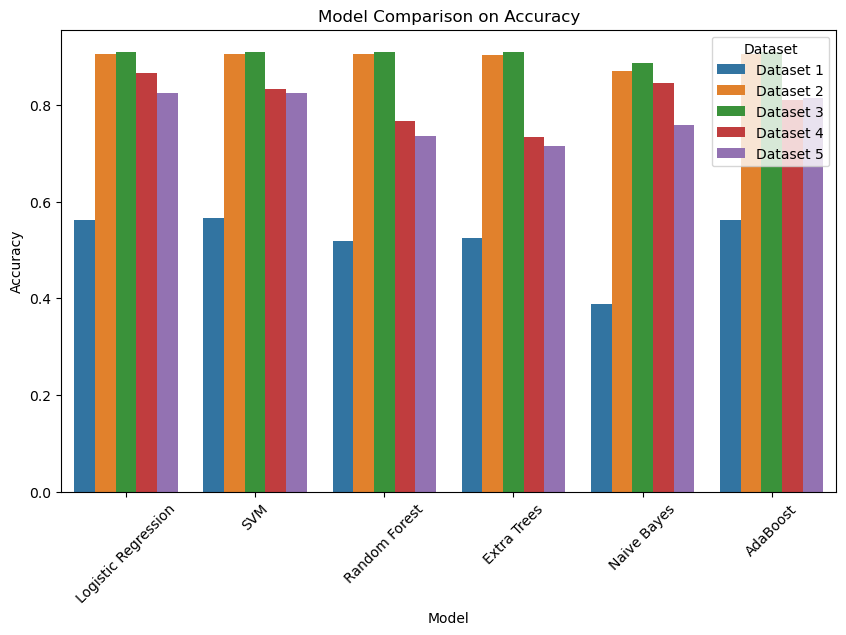

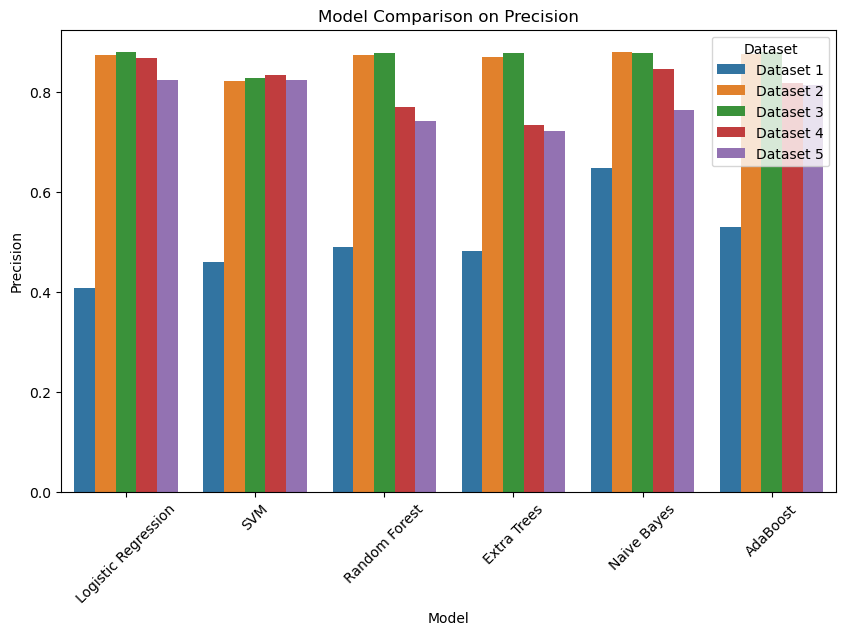

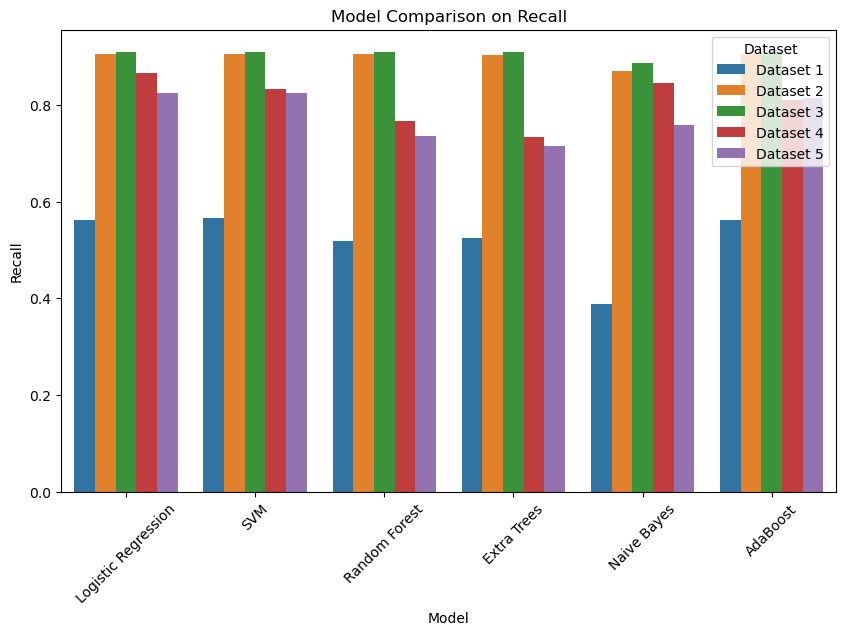

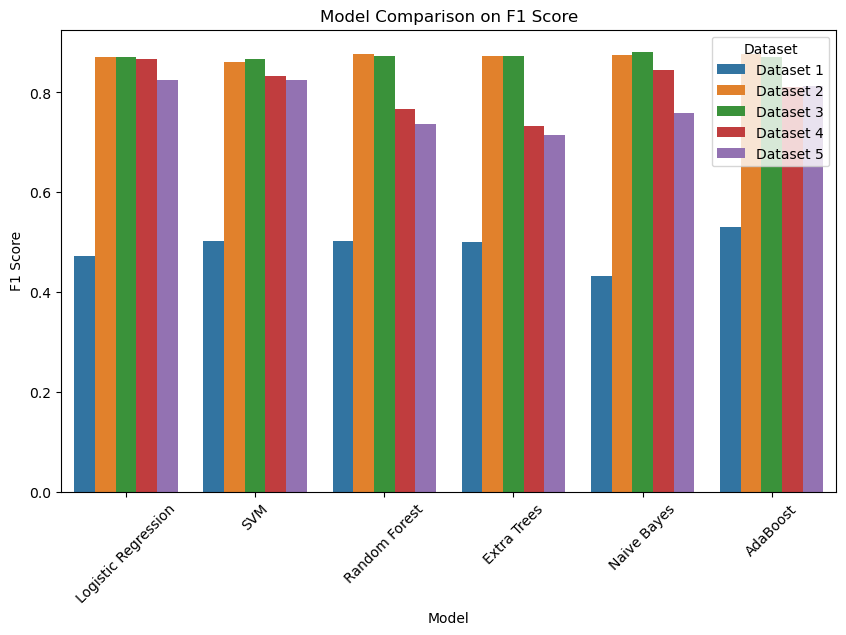

In [27]:
# Plot results for each metric across datasets and models
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Model", y=metric, hue="Dataset", data=results_df)
    plt.title(f"Model Comparison on {metric}")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title="Dataset")
    plt.show()


Processing Dataset 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression - Accuracy: 0.56, Precision: 0.44, Recall: 0.56, F1 Score: 0.49


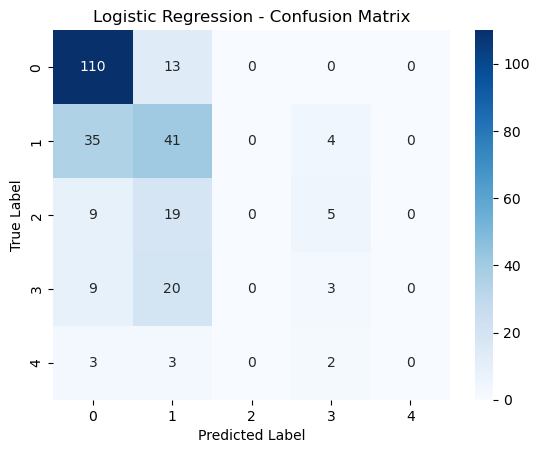

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM - Accuracy: 0.55, Precision: 0.53, Recall: 0.55, F1 Score: 0.52


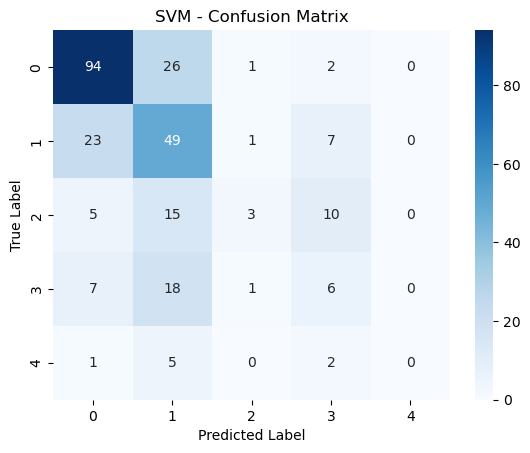

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Random Forest - Accuracy: 0.53, Precision: 0.48, Recall: 0.53, F1 Score: 0.50


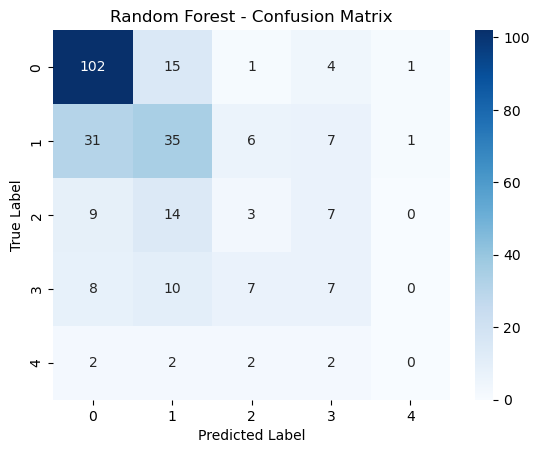

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Extra Trees - Accuracy: 0.53, Precision: 0.51, Recall: 0.53, F1 Score: 0.52


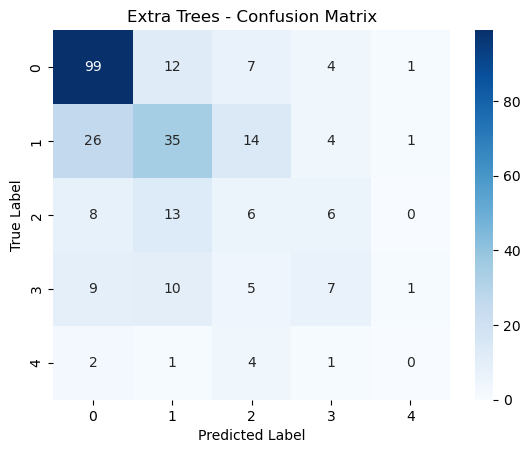

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Naive Bayes - Accuracy: 0.39, Precision: 0.66, Recall: 0.39, F1 Score: 0.43


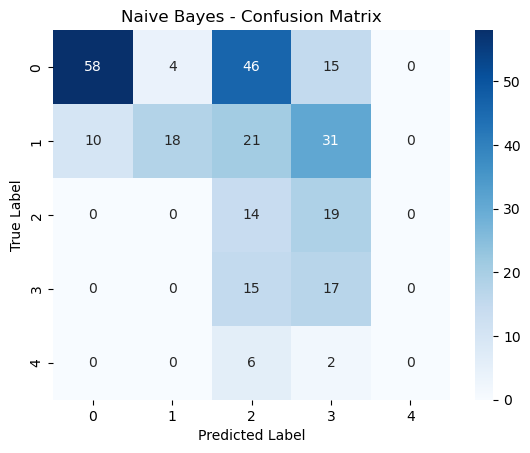

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda


AdaBoost - Accuracy: 0.58, Precision: 0.54, Recall: 0.58, F1 Score: 0.54


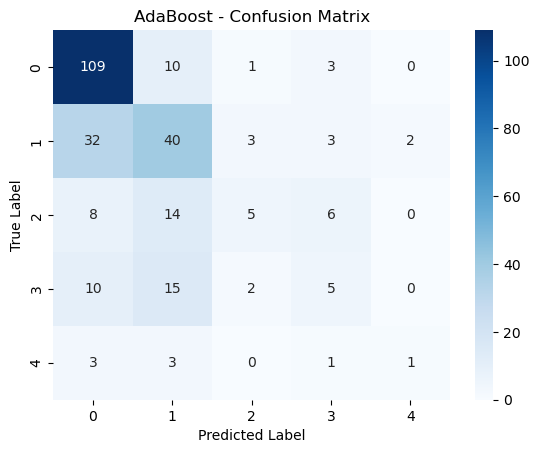


Processing Dataset 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Logistic Regression - Accuracy: 0.90, Precision: 0.87, Recall: 0.90, F1 Score: 0.87


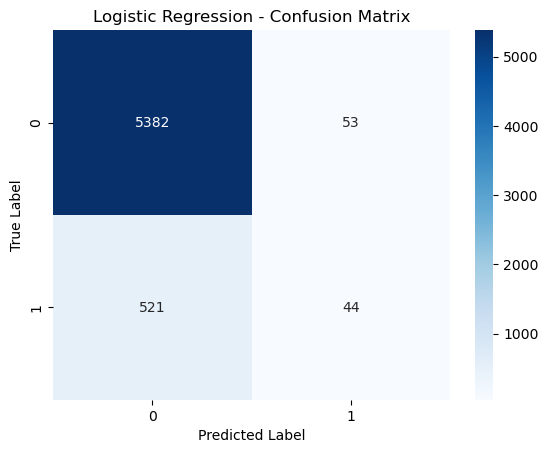

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM - Accuracy: 0.91, Precision: 0.82, Recall: 0.91, F1 Score: 0.86


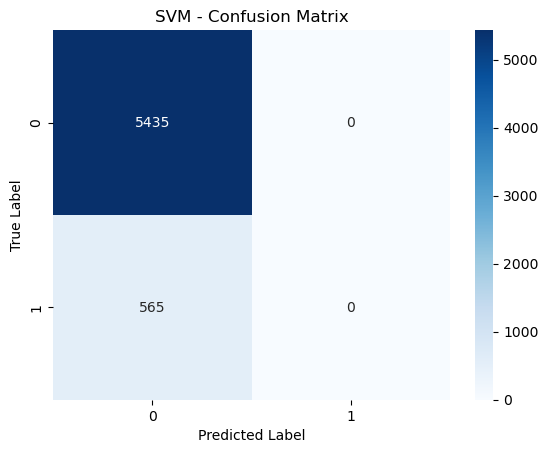

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Random Forest - Accuracy: 0.90, Precision: 0.87, Recall: 0.90, F1 Score: 0.87


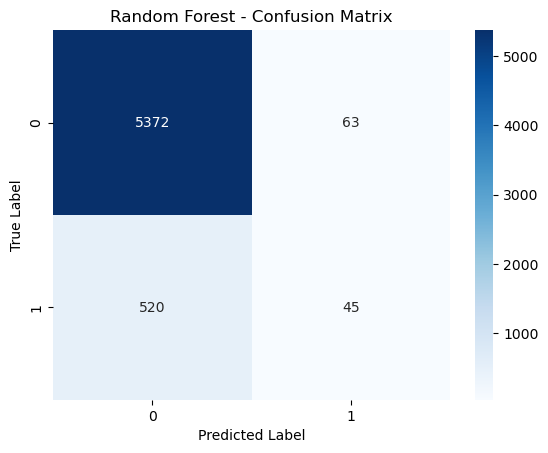

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Extra Trees - Accuracy: 0.90, Precision: 0.87, Recall: 0.90, F1 Score: 0.87


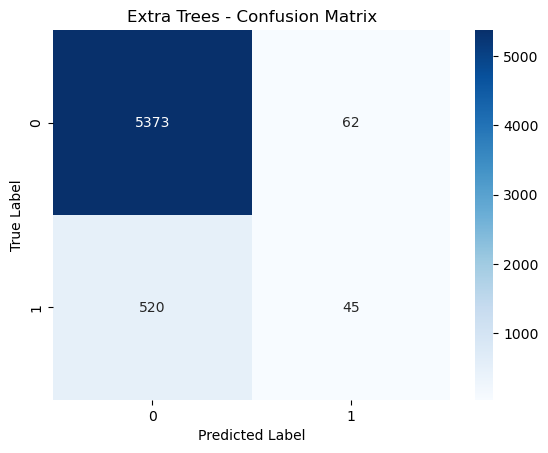


Naive Bayes - Accuracy: 0.86, Precision: 0.87, Recall: 0.86, F1 Score: 0.87


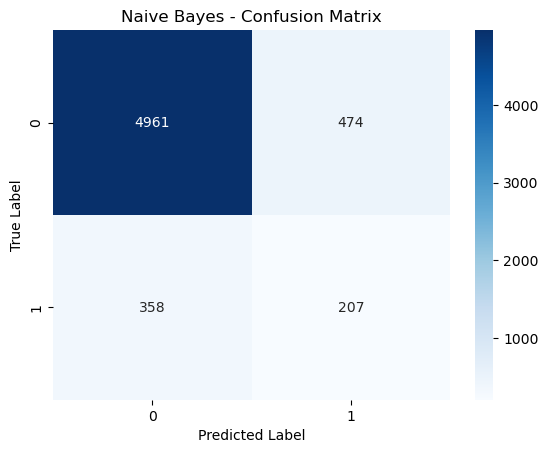

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda


AdaBoost - Accuracy: 0.91, Precision: 0.87, Recall: 0.91, F1 Score: 0.87


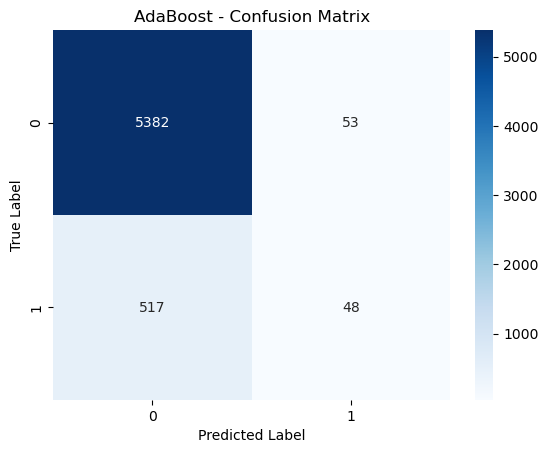


Processing Dataset 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Logistic Regression - Accuracy: 0.91, Precision: 0.87, Recall: 0.91, F1 Score: 0.87


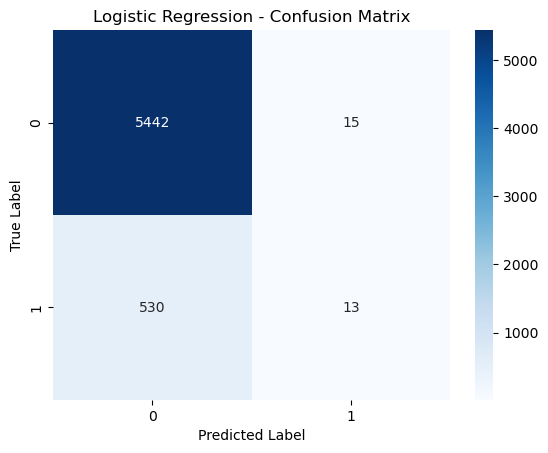

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM - Accuracy: 0.91, Precision: 0.83, Recall: 0.91, F1 Score: 0.87


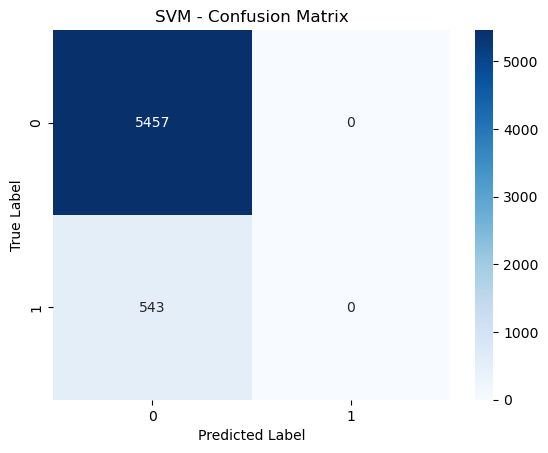

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Random Forest - Accuracy: 0.91, Precision: 0.87, Recall: 0.91, F1 Score: 0.87


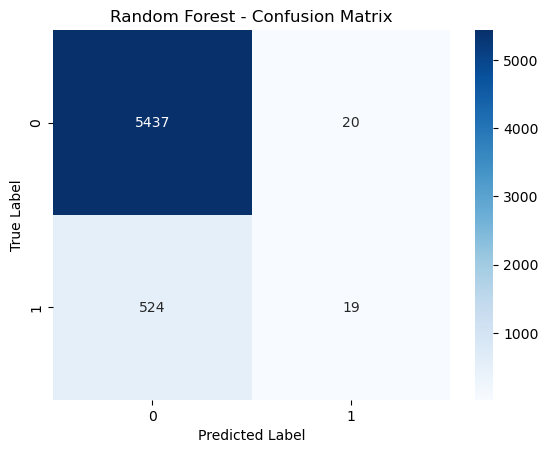

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Extra Trees - Accuracy: 0.91, Precision: 0.87, Recall: 0.91, F1 Score: 0.87


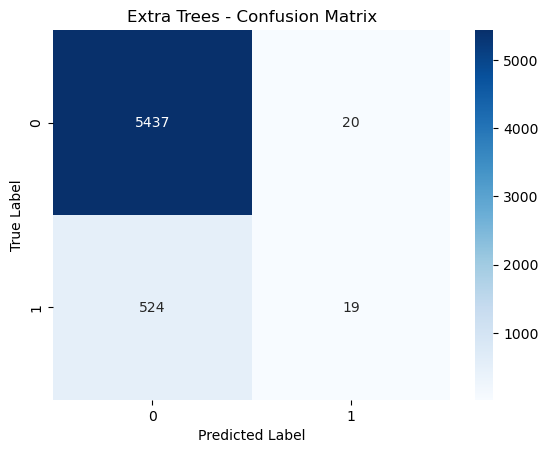


Naive Bayes - Accuracy: 0.89, Precision: 0.88, Recall: 0.89, F1 Score: 0.88


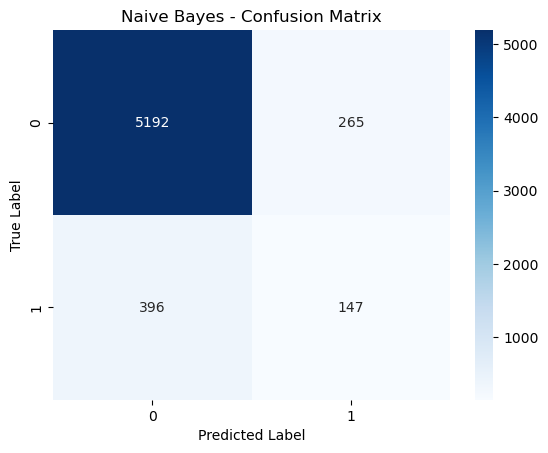

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda


AdaBoost - Accuracy: 0.91, Precision: 0.87, Recall: 0.91, F1 Score: 0.87


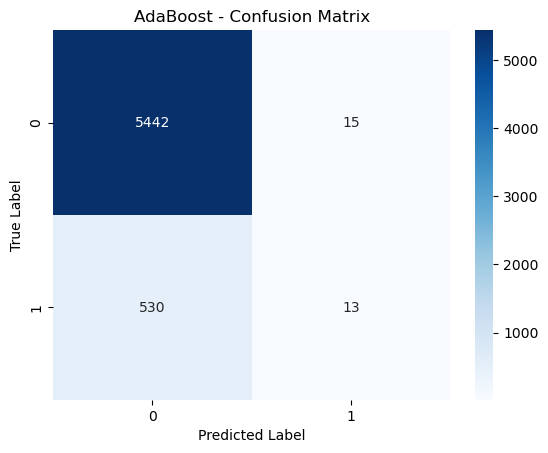


Processing Dataset 4

Logistic Regression - Accuracy: 0.86, Precision: 0.86, Recall: 0.86, F1 Score: 0.85


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


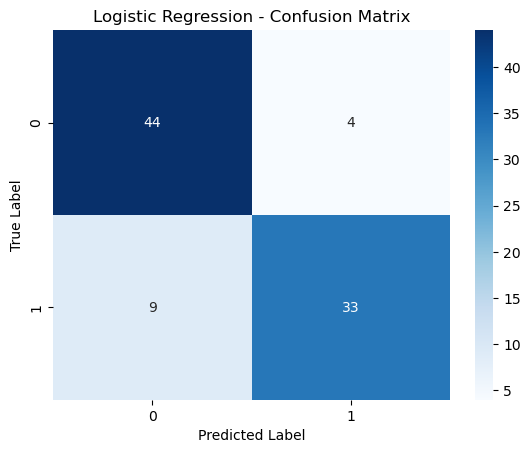

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



SVM - Accuracy: 0.86, Precision: 0.86, Recall: 0.86, F1 Score: 0.85


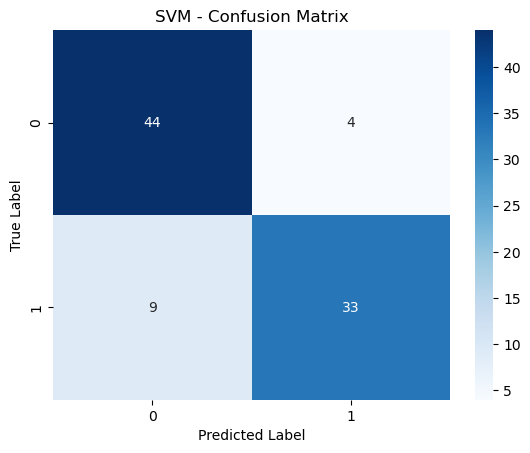

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Random Forest - Accuracy: 0.76, Precision: 0.76, Recall: 0.76, F1 Score: 0.76


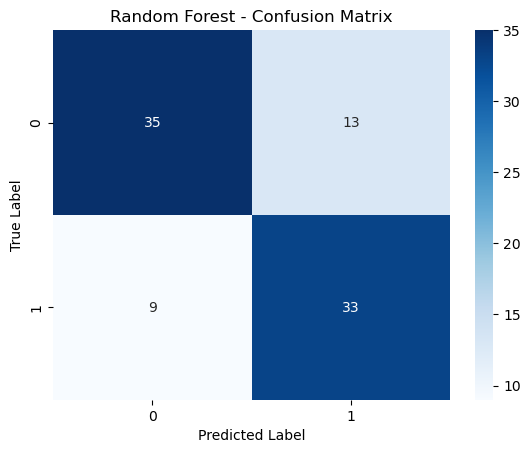

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Extra Trees - Accuracy: 0.79, Precision: 0.79, Recall: 0.79, F1 Score: 0.79


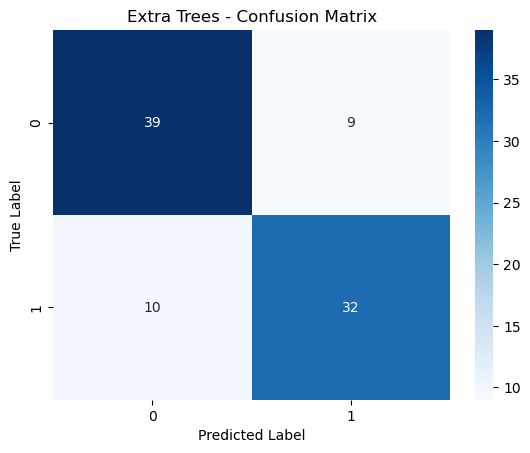


Naive Bayes - Accuracy: 0.84, Precision: 0.85, Recall: 0.84, F1 Score: 0.84


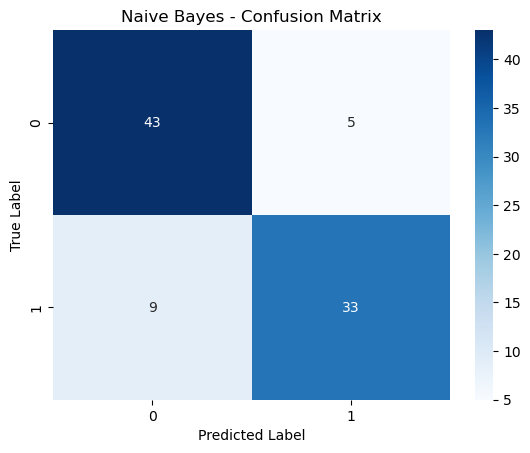

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda


AdaBoost - Accuracy: 0.82, Precision: 0.82, Recall: 0.82, F1 Score: 0.82


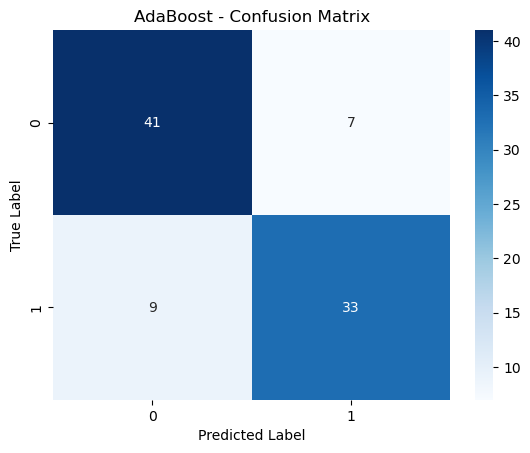


Processing Dataset 5

Logistic Regression - Accuracy: 0.80, Precision: 0.80, Recall: 0.80, F1 Score: 0.80


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


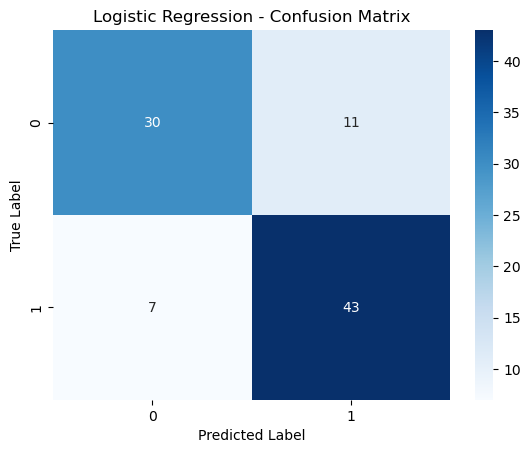

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



SVM - Accuracy: 0.76, Precision: 0.76, Recall: 0.76, F1 Score: 0.76


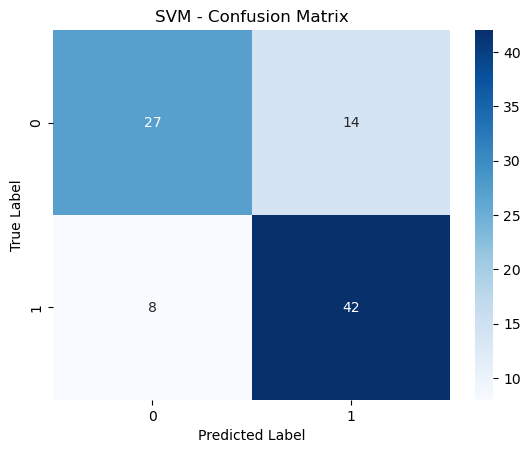

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Random Forest - Accuracy: 0.75, Precision: 0.75, Recall: 0.75, F1 Score: 0.75


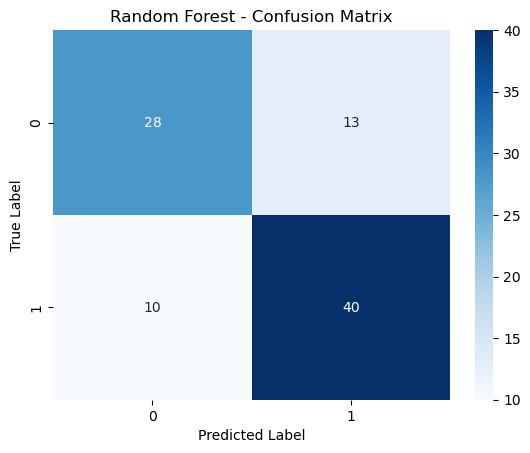

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Extra Trees - Accuracy: 0.74, Precision: 0.74, Recall: 0.74, F1 Score: 0.74


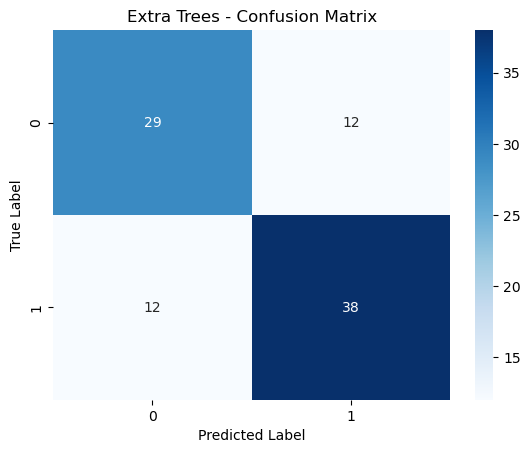


Naive Bayes - Accuracy: 0.82, Precision: 0.83, Recall: 0.82, F1 Score: 0.82


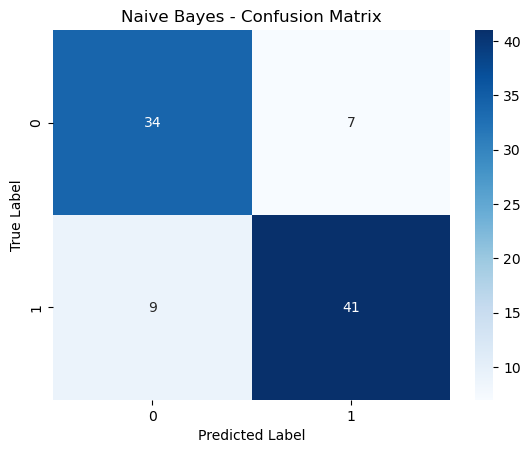

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda


AdaBoost - Accuracy: 0.78, Precision: 0.79, Recall: 0.78, F1 Score: 0.78


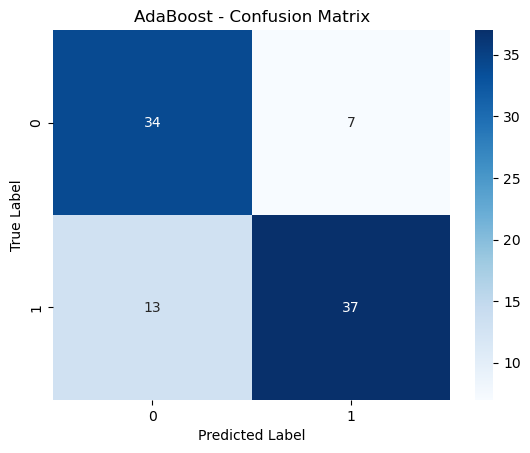

In [17]:
# Run the full methodology on each dataset with optimizations
for i, (X, y) in enumerate(datasets):
    print(f"\nProcessing Dataset {i+1}")
    
    # Apply optimized feature selection
    X_selected = apply_feature_selection(X, y, method='univariate')
    
    # Train and evaluate models
    train_and_evaluate(X_selected, y)